In [1]:
library(breakaway); packageVersion("breakaway")  
library(DivNet)
library(qiime2R)
library(tidyr)
library(tibble)
library(ggplot2)
library(vegan)
library(microbiome)
library(phyloseq)
library("tidyverse")
library("dplyr")
library(magrittr)
library(lme4)
library(lsmeans)

[1] ‘4.7.9’

Loading required package: phyloseq

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-7


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2020 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:vegan’:

    diversity


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform


── Attaching packages ────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ readr   2.1.2     ✔ stringr 1.4.0
✔ purrr   0.3.4     ✔ forcats 0.5.1
✔ dplyr   1.0.9     

── Conflicts ───────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ microbiome::alpha() masks ggplot2::alpha()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()


Attaching package: ‘magrittr’


The following object is maske

ERROR: Error in library(microbiomeSeq): there is no package called ‘microbiomeSeq’


In [19]:
# Read in the 16S qza files and clean them up for phyloseq
ASVs <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/table-BacArc_resistada.qza")
ASVs <- ASVs$data # Extract the count data from list
taxa_16S <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/taxonomy_resistada.qza")
taxa_16S <- taxa_16S$data %>% as_tibble() %>% separate(Taxon, sep=";",
c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")) %>% 
# Convert taxonomy info to data frame with correct taxonomy labels
#taxa <- taxa_16S[-1,]
select(-Confidence) %>% arrange(Feature.ID) %>% mutate(ASV = 1:n()) %>% 
mutate(newcol = "ASV") %>%
unite("ASVs", newcol:ASV) %>%
filter(Phylum !=" p__Chlorophyta") %>%
filter(Phylum !="NA")
#asv_tab$asv_id <- rownames(asv_tab) # add a new column for ids
tree_file <-read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/rooted-BacArc_resistada.qza")$data

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 5374 rows [3, 6, 9, 11, 12, 14, 15, 16, 17, 18, 22, 23, 27, 31, 36, 38, 42, 45, 49, 51, ...].”


In [20]:
meta = read.csv("/Users/stephanie.rosales/Documents/omics_projects/Resitada/metadata_RESISTADA.csv", 
                header = T, row.names = 1,
na.strings = c("", "NA"))

In [21]:
ps= phyloseq(otu_table(ASVs, taxa_are_rows= T),
tax_table(as.data.frame(taxa_16S) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(meta), tree_file)
ps

dups = c("N169_256_R2", "N157_265_R2", "N165_296_R2", "N161_A067_R2", "N185_A088_R2",
                                 "N164_A089_R2","N119_A107","N267_A110","N7_A114", "N156_A115","N158_A116",
                                 "N101_A118","N160_A119","N277_A125")

ps = subset_samples(ps, !ID %in% dups & Genotype!=c("U41"))
                                                    #,"U44")) 
ps


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 280 samples ]
sample_data() Sample Data:       [ 280 samples by 51 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 51 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [22]:
ps_Clipped =subset_samples(ps, Type=="Clipped")
ps_Clipped


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 51 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [12]:
glom_ps_phy =tax_glom(t(ps_Clipped), taxrank="Genus")

In [13]:
glom_ps_phy

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 619 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 619 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 619 tips and 618 internal nodes ]

In [22]:
divnet_phylum_char <- glom_ps_phy %>%
  divnet(ncores = 4, base = "ff3e7637bd5aac86cff3b72f9ee78f47", X = NULL)

Removing absent taxa!



  |                                                                      |   0%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |============                                                          |  17%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |=======================                                               |  33%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |===================================                                   |  50%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |===============================================                       |  67%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |==========================================================            |  83%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |======================================================================| 100%
  |                                                                      |   0%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |============                                                          |  17%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |=======================                                               |  33%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |===================================                                   |  50%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |===============================================                       |  67%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |==========================================================            |  83%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |======================================================================| 100%
  |                                                                      |   0%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |============                                                          |  17%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |=======================                                               |  33%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |===================================                                   |  50%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |===============================================                       |  67%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |==========================================================            |  83%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |======================================================================| 100%
  |                                                                      |   0%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |============                                                          |  17%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |=======================                                               |  33%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |===================================                                   |  50%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |===============================================                       |  67%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |==========================================================            |  83%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |======================================================================| 100%
  |                                                                      |   0%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |============                                                          |  17%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |=======================                                               |  33%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |===================================                                   |  50%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |===============================================                       |  67%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |==========================================================            |  83%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |======================================================================| 100%
  |                                                                      |   0%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |============                                                          |  17%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |=======================                                               |  33%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |===================================                                   |  50%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |===============================================                       |  67%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |==========================================================            |  83%

Warning message in MCmat(Y = Y_p, W = W, eY = eY, N = N, Q = Q, base = base, sigma = sigma, :
“Running in series; one of the packages doParallel, foreach or doSNOW is missing”


  |======================================================================| 100%


In [18]:
testDiversity(divnet_phylum_char)

Hypothesis testing:
  p-value for global test: 0 


,Estimates,Standard Errors,p-values
(Intercept),0.2396340,0.002389326,0
predictorsPlacebo,-0.1591352,0.002500864,0


In [23]:
head(divnet_phylum_char$shannon %>% summary)

estimate,error,lower,upper,sample_names,name,model
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
0.62626964,0.008075949,0.61011774,0.64242154,N10-A019,DivNet,Aitchison
0.09857572,0.005534877,0.08750596,0.10964547,N11-A153,DivNet,Aitchison
2.34831058,0.004809826,2.33869093,2.35793023,N115-247,DivNet,Aitchison
0.14014873,0.004882255,0.13038422,0.14991324,N12-A008,DivNet,Aitchison
0.44885416,0.008915596,0.43102297,0.46668536,N13-A038,DivNet,Aitchison
0.04024386,0.001394025,0.03745581,0.04303191,N14-A040,DivNet,Aitchison


In [19]:
combined_shannon <- meta %>%
  left_join(divnet_phylum_char$shannon %>% summary,
            by = "sample_names")
combined_shannon

sample_names,featurecounts,Initial_sample_ID,Tag,Date_Collected,Date,TimePoint,Replicate,Genotype,Nursery,⋯,Forward_Primer_Pad,Golay_Barcode,X515FB_Forward_Primer,Primer_For_PCR,estimate,error,lower,upper,name,model
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
N13-A038,26888,13,A038,26-Oct-20,26-Oct,5,NA,Cooper-9,UM,⋯,TATGGTAATT,CTACAGGGTCTC,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTCTACAGGGTCTCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,0.23963400,0.07503098,0.08957204,0.3896960,DivNet,Aitchison
N14-A040,38951,14,A040,28-Oct-20,28-Oct,6,NA,Acerv2,UM,⋯,TATGGTAATT,TTGAACAAGCCA,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTTTGAACAAGCCATATGGTAATTGTGTGYCAGCMGCCGCGGTAA,0.23963400,0.07503098,0.08957204,0.3896960,DivNet,Aitchison
N23-A166,16954,23,A166,30-Oct-20,30-Oct,8,NA,K2,CRF,⋯,TATGGTAATT,AGCCTTCGTCGC,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTAGCCTTCGTCGCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,NA,NA,NA,NA,NA,NA
N22-A121,67201,22,A121,30-Oct-20,30-Oct,8,NA,U44,CRF,⋯,TATGGTAATT,AGCCTTCGTCGC,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTAGCCTTCGTCGCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,NA,NA,NA,NA,NA,NA
N266-A104,29691,266,A104,10-Nov-20,10-Nov,19,NA,U44,CRF,⋯,TATGGTAATT,CTACAGGGTCTC,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTCTACAGGGTCTCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,0.23963400,0.07503098,0.08957204,0.3896960,DivNet,Aitchison
N267-A110,32445,267,A110,10-Nov-20,10-Nov,19,NA,U41,CRF,⋯,TATGGTAATT,CTACAGGGTCTC,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTCTACAGGGTCTCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,NA,NA,NA,NA,NA,NA
N28-A027,44848,28,A027,30-Oct-20,30-Oct,8,NA,Cooper-9,UM,⋯,TATGGTAATT,AGCCTTCGTCGC,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTAGCCTTCGTCGCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,NA,NA,NA,NA,NA,NA
N29-A041,31284,29,A041,30-Oct-20,30-Oct,8,NA,Acerv2,UM,⋯,TATGGTAATT,AGCCTTCGTCGC,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTAGCCTTCGTCGCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,NA,NA,NA,NA,NA,NA
N27-283,16502,27,283,30-Oct-20,30-Oct,8,NA,FM14,FWC,⋯,TATGGTAATT,AGCCTTCGTCGC,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTAGCCTTCGTCGCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,NA,NA,NA,NA,NA,NA


In [28]:
#write.csv(combined_shannon, 
 #         "/Users/stephanie.rosales/Documents/omics_projects/Resitada/combined_shannon.csv")

In [2]:
meta = read.csv("/Users/stephanie.rosales/Documents/omics_projects/Resitada/metadata_RESISTADA.csv", 
                header = T, row.names = 1,
na.strings = c("", "NA"))
dim(meta)

[1] 284  51

In [62]:
meta1 = meta %>%
filter(estimate>0)
dim(meta1)

[1] 192  51

In [63]:
ambient_PL= meta1 %>%
filter(Nutrients == "Ambient", Diseased=="Placebo", )

dim(ambient_PL)

[1] 42 51

In [97]:
mixed.lmer_geno <- lmer(estimate ~ -1 + Genotype + (1|Tag) , data =ambient_PL)
summary(mixed.lmer_geno)

emmeans(mixed.lmer_geno, pairwise ~ -1 + Genotype, adjust="tukey")

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 1.46806 (tol = 0.002, component 1)”
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model is nearly unidentifiable: very large eigenvalue
 - Rescale variables?”


Linear mixed model fit by REML ['lmerMod']
Formula: estimate ~ -1 + Genotype + (1 | Tag)
   Data: ambient_PL

REML criterion at convergence: -2434.8

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-2.434  0.000  0.000  0.000  0.000 

Random effects:
 Groups   Name        Variance  Std.Dev. 
 Tag      (Intercept) 2.019e-36 1.421e-18
 Residual             3.250e-35 5.700e-18
Number of obs: 42, groups:  Tag, 28

Fixed effects:
                  Estimate Std. Error   t value
GenotypeAcerv2   8.050e-02  2.468e-18 3.262e+16
GenotypeCooper-9 8.050e-02  2.687e-18 2.995e+16
GenotypeElkhorn  8.050e-02  3.456e-18 2.329e+16
GenotypeFM14     8.050e-02  2.979e-18 2.702e+16
GenotypeFM19     8.050e-02  3.392e-18 2.373e+16
GenotypeFM6      8.050e-02  3.392e-18 2.373e+16
GenotypeFM9      8.050e-02  3.392e-18 2.373e+16
GenotypeK2       8.050e-02  3.022e-18 2.664e+16
GenotypeKelsey-1 8.050e-02  2.687e-18 2.995e+16
GenotypeU44      8.050e-02  2.468e-18 3.262e+16

Correlation of Fixed Effects:
     

$emmeans
 Genotype emmean       SE   df lower.CL upper.CL
 Acerv2   0.0805 2.47e-18 10.4   0.0805   0.0805
 Cooper-9 0.0805 2.73e-18 13.2   0.0805   0.0805
 Elkhorn  0.0805 3.52e-18 15.4   0.0805   0.0805
 FM14     0.0805 3.04e-18 18.8   0.0805   0.0805
 FM19     0.0805 3.39e-18 29.8   0.0805   0.0805
 FM6      0.0805 3.39e-18 29.8   0.0805   0.0805
 FM9      0.0805 3.39e-18 29.8   0.0805   0.0805
 K2       0.0805 3.02e-18 10.4   0.0805   0.0805
 Kelsey-1 0.0805 2.73e-18 13.2   0.0805   0.0805
 U44      0.0805 2.47e-18 10.4   0.0805   0.0805

Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

$contrasts
 contrast                 estimate       SE   df t.ratio p.value
 Acerv2 - (Cooper-9)      0.00e+00 3.68e-18 11.8   0.000  1.0000
 Acerv2 - Elkhorn         0.00e+00 4.30e-18 13.5   0.000  1.0000
 Acerv2 - FM14           -1.39e-17 3.92e-18 14.7  -3.543  0.0645
 Acerv2 - FM19            0.00e+00 4.19e-18 21.9   0.000  1.0000
 Acerv2 - FM6             0.00e+00 4.19e-18

In [98]:
PLac= meta1 %>%
filter(Diseased=="Placebo")

dim(PLac)

PLac$Combo

[1] 106  51

[1] "NH4_Placebo"     "Ambient_Placebo" "Ambient_Placebo" "Ambient_Placebo"
  [5] "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"    
  [9] "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"    
 [13] "Ambient_Placebo" "Ambient_Placebo" "Ambient_Placebo" "Ambient_Placebo"
 [17] "Ambient_Placebo" "Ambient_Placebo" "NH4_Placebo"     "NH4_Placebo"    
 [21] "NH4_Placebo"     "NH4_Placebo"     "Ambient_Placebo" "Ambient_Placebo"
 [25] "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"    
 [29] "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"     "Ambient_Placebo"
 [33] "Ambient_Placebo" "Ambient_Placebo" "Ambient_Placebo" "NH4_Placebo"    
 [37] "Ambient_Placebo" "NH4_Placebo"     "Ambient_Placebo" "NH4_Placebo"    
 [41] "Ambient_Placebo" "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"    
 [45] "Ambient_Placebo" "Ambient_Placebo" "NH4_Placebo"     "Ambient_Placebo"
 [49] "Ambient_Placebo" "NH4_Placebo"     "Ambient_Placebo" "Ambient_Placebo"
 [53] "Ambient_Placebo" "Ambient_Placebo" "Ambient_Placebo" "Ambient_Placebo"
 [57] "Ambient_Placebo" "Ambient_Placebo" "Ambient_Placebo" "Ambient_Placebo"
 [61] "Ambient_Placebo" "Ambient_Placebo" "Ambient_Placebo" "Ambient_Placebo"
 [65] "Ambient_Placebo" "Ambient_Placebo" "Ambient_Placebo" "Ambient_Placebo"
 [69] "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"    
 [73] "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"    
 [77] "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"    
 [81] "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"    
 [85] "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"    
 [89] "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"    
 [93] "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"    
 [97] "NH4_Placebo"     "NH4_Placebo"     "Ambient_Placebo" "NH4_Placebo"    
[101] "NH4_Placebo"     "NH4_Placebo"     "Ambient_Placebo" "NH4_Placebo"    
[105] "NH4_Placebo"     "NH4_Placebo"

In [99]:
mixed.lmer_TT <- lmer(estimate~ Nutrients + (1|Tag:Genotype), data =PLac)
summary(mixed.lmer_TT)
emmeans(mixed.lmer_TT, pairwise ~ -1 + Nutrients, adjust="tukey")

boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML ['lmerMod']
Formula: estimate ~ Nutrients + (1 | Tag:Genotype)
   Data: PLac

REML criterion at convergence: -7354.2

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.215 -1.215 -0.810 -0.810 -0.810 

Random effects:
 Groups       Name        Variance  Std.Dev. 
 Tag:Genotype (Intercept) 3.715e-42 1.927e-21
 Residual                 1.057e-32 1.028e-16
Number of obs: 106, groups:  Tag:Genotype, 82

Fixed effects:
               Estimate Std. Error    t value
(Intercept)   8.050e-02  1.586e-17  5.075e+15
NutrientsNH4 -3.502e-17  2.041e-17 -1.716e+00

Correlation of Fixed Effects:
            (Intr)
NutrintsNH4 -0.777
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see help('isSingular')


$emmeans
 Nutrients emmean      SE   df lower.CL upper.CL
 Ambient   0.0805 1.6e-17 51.5   0.0805   0.0805
 NH4       0.0805 1.3e-17 84.5   0.0805   0.0805

Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

$contrasts
 contrast      estimate       SE   df t.ratio p.value
 Ambient - NH4  3.5e-17 2.06e-17 63.4   1.700  0.0941

Degrees-of-freedom method: kenward-roger 


In [16]:
paired_df= meta1 %>%
filter(Pairs=="paired")

dim(paired_df)
paired_df$Pairs

[1] 135  51

[1] "paired" "paired" "paired" "paired" "paired" "paired" "paired" "paired"
  [9] "paired" "paired" "paired" "paired" "paired" "paired" "paired" "paired"
 [17] "paired" "paired" "paired" "paired" "paired" "paired" "paired" "paired"
 [25] "paired" "paired" "paired" "paired" "paired" "paired" "paired" "paired"
 [33] "paired" "paired" "paired" "paired" "paired" "paired" "paired" "paired"
 [41] "paired" "paired" "paired" "paired" "paired" "paired" "paired" "paired"
 [49] "paired" "paired" "paired" "paired" "paired" "paired" "paired" "paired"
 [57] "paired" "paired" "paired" "paired" "paired" "paired" "paired" "paired"
 [65] "paired" "paired" "paired" "paired" "paired" "paired" "paired" "paired"
 [73] "paired" "paired" "paired" "paired" "paired" "paired" "paired" "paired"
 [81] "paired" "paired" "paired" "paired" "paired" "paired" "paired" "paired"
 [89] "paired" "paired" "paired" "paired" "paired" "paired" "paired" "paired"
 [97] "paired" "paired" "paired" "paired" "paired" "paired" "paired" "paired"
[105] "paired" "paired" "paired" "paired" "paired" "paired" "paired" "paired"
[113] "paired" "paired" "paired" "paired" "paired" "paired" "paired" "paired"
[121] "paired" "paired" "paired" "paired" "paired" "paired" "paired" "paired"
[129] "paired" "paired" "paired" "paired" "paired" "paired" "paired"

In [93]:
mixed.lmer_TT <- lmer(estimate~Combo + (1|Tag:Genotype), data =paired_df)
summary(mixed.lmer_TT)
emmeans(mixed.lmer_TT, pairwise ~ -1 + Combo, adjust="tukey")

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 1.72894 (tol = 0.002, component 1)”
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model is nearly unidentifiable: very large eigenvalue
 - Rescale variables?”


Linear mixed model fit by REML ['lmerMod']
Formula: estimate ~ Combo + (1 | Tag:Genotype)
   Data: paired_df

REML criterion at convergence: -9301.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.8685 -0.4343 -0.4343 -0.2171  0.8685 

Random effects:
 Groups       Name        Variance  Std.Dev. 
 Tag:Genotype (Intercept) 4.010e-33 6.333e-17
 Residual                 4.085e-33 6.391e-17
Number of obs: 135, groups:  Tag:Genotype, 112

Fixed effects:
                       Estimate Std. Error    t value
(Intercept)           2.396e-01  1.765e-17  1.358e+16
ComboAmbient_Placebo -1.591e-01  2.464e-17 -6.459e+15
ComboNH4_Pathogen     2.050e-16  2.376e-17  8.631e+00
ComboNH4_Placebo     -1.591e-01  2.338e-17 -6.805e+15

Correlation of Fixed Effects:
            (Intr) CmbA_P CmbNH4_Pt
CmbAmbnt_Pl -0.716                 
CmbNH4_Pthg -0.743  0.532          
CmbNH4_Plcb -0.755  0.540  0.560   
optimizer (nloptwrap) convergence code: 0 (OK)
Model failed to converge with max|grad|

$emmeans
 Combo            emmean       SE    df lower.CL upper.CL
 Ambient_Pathogen 0.2396 1.76e-17 121.5   0.2396   0.2396
 Ambient_Placebo  0.0805 1.72e-17  81.0   0.0805   0.0805
 NH4_Pathogen     0.2396 1.59e-17 121.5   0.2396   0.2396
 NH4_Placebo      0.0805 1.54e-17  97.2   0.0805   0.0805

Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

$contrasts
 contrast                           estimate       SE  df               t.ratio
 Ambient_Pathogen - Ambient_Placebo    0.159 2.47e-17 103  6452379014266199.000
 Ambient_Pathogen - NH4_Pathogen       0.000 2.38e-17 121                -9.000
 Ambient_Pathogen - NH4_Placebo        0.159 2.34e-17 112  6798315930484525.000
 Ambient_Placebo - NH4_Pathogen       -0.159 2.34e-17 100 -6786251728791907.000
 Ambient_Placebo - NH4_Placebo         0.000 2.31e-17  88                -1.000
 NH4_Pathogen - NH4_Placebo            0.159 2.21e-17 111  7192247765998283.000
 p.value
  <.0001
  <.0001
  <.0001
  <.0001
  0.6274
  <

In [94]:
mixed.lmer_TT <- lmer(estimate~Health + (1|Tag:Genotype), data =paired_df)
summary(mixed.lmer_TT)
emmeans(mixed.lmer_TT, pairwise ~ -1 + Health, adjust="tukey")

Linear mixed model fit by REML ['lmerMod']
Formula: estimate ~ Health + (1 | Tag:Genotype)
   Data: paired_df

REML criterion at convergence: -468.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6927 -0.1004 -0.1004  0.1688  2.8737 

Random effects:
 Groups       Name        Variance  Std.Dev.
 Tag:Genotype (Intercept) 0.0016421 0.04052 
 Residual                 0.0003414 0.01848 
Number of obs: 135, groups:  Tag:Genotype, 112

Fixed effects:
            Estimate Std. Error t value
(Intercept) 0.100191   0.005791   17.30
HealthDL    0.121321   0.007977   15.21

Correlation of Fixed Effects:
         (Intr)
HealthDL -0.694

$emmeans
 Health emmean      SE  df lower.CL upper.CL
 AH      0.100 0.00582 115   0.0887    0.112
 DL      0.222 0.00577 123   0.2101    0.233

Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

$contrasts
 contrast estimate      SE  df t.ratio p.value
 AH - DL    -0.121 0.00805 127 -15.074  <.0001

Degrees-of-freedom method: kenward-roger 


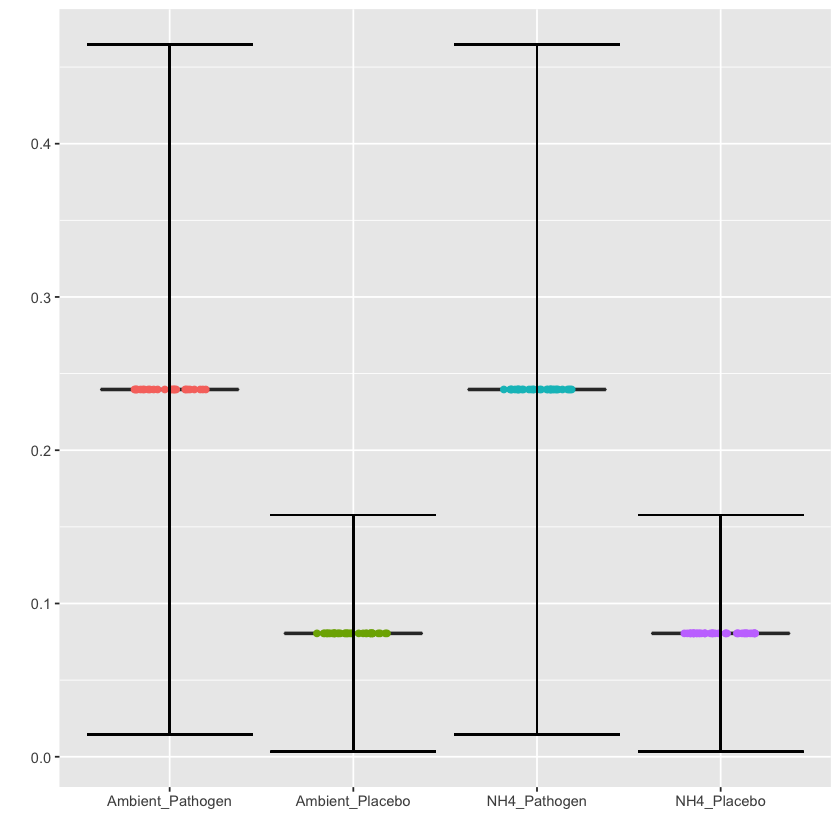

In [58]:
paired_df  %>%
gather(key = metric, value = value, c("name")) %>%
  mutate(metric = factor(metric, levels = c("name"))) %>%
  ggplot(aes(x = Combo, y = estimate)) +
  geom_boxplot(outlier.color = NA) +
  geom_jitter(aes(color = Combo), height = 0, width = .2) +
  labs(x = "", y = "") +
 geom_errorbar(aes(ymin = lower - error, 
ymax = upper + error)) +
  #facet_wrap(~ metric, scales = "free") +
  theme(legend.position="none")

In [40]:
(ps_rare <- phyloseq::rarefy_even_depth(ps_Clipped, rngseed = 123, replace = FALSE))             


`set.seed(123)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(123); .Random.seed` for the full vector

...

5499OTUs were removed because they are no longer 
present in any sample after random subsampling


...



phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 3993 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 51 sample variables ]
tax_table()   Taxonomy Table:    [ 3993 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 3993 tips and 3538 internal nodes ]

In [82]:
adiv <- data.frame(
  "Simpson" = phyloseq::estimate_richness(ps_rare, measures = "Simpson"),
  "Shannon" = phyloseq::estimate_richness(ps_rare, measures = "Shannon"),
  "Combo" = phyloseq::sample_data(ps_rare)$Combo) %>% rownames_to_column("sample_names")
head(adiv)

,sample_names,Simpson,Shannon,Combo
,<chr>,<dbl>,<dbl>,<chr>
1,N10-A019,0.9165302,2.688475,NH4_Placebo
2,N11-A153,0.8911621,2.303332,NH4_Pathogen
3,N115-247,0.9810130,4.232491,NH4_Pathogen
4,N12-A008,0.8919527,2.338363,NH4_Placebo
5,N13-A038,0.9083314,2.573971,NH4_Pathogen
6,N14-A040,0.8875314,2.226630,NH4_Pathogen


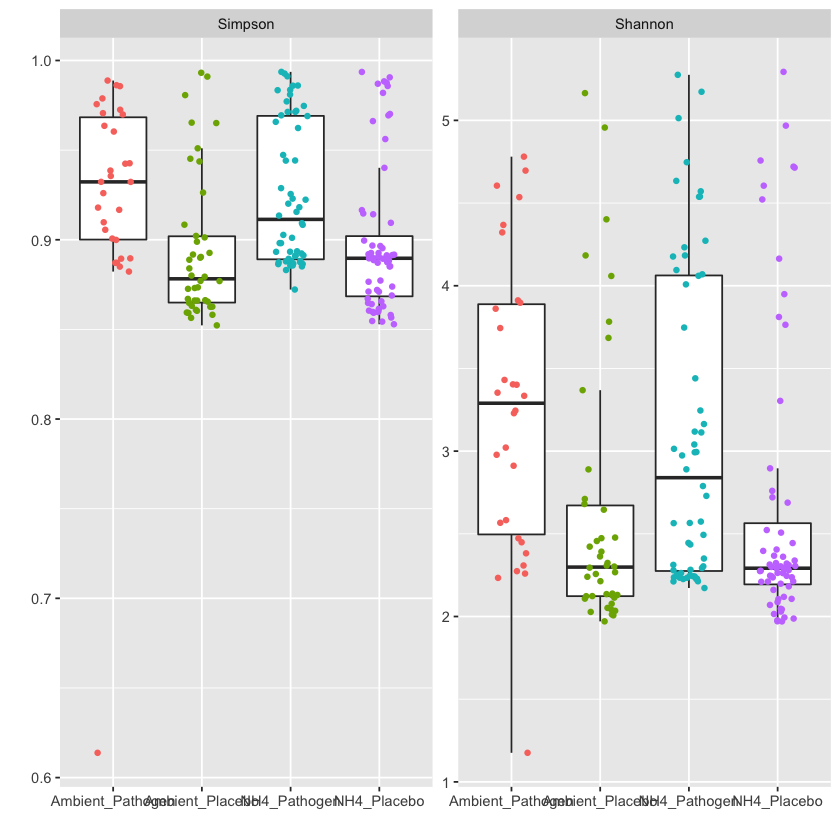

In [55]:
adiv %>%
  gather(key = metric, value = value, c("Simpson", "Shannon")) %>%
  mutate(metric = factor(metric, levels = c("Simpson", "Shannon"))) %>%
  ggplot(aes(x = Combo, y = value) +
  g
  geom_boxplot(outlier.color = NA) +
  geom_jitter(aes(color = Combo), height = 0, width = .2) +
  labs(x = "", y = "") +
  facet_wrap(~ metric, scales = "free") +
  theme(legend.position="none")

In [86]:
head(adiv)

,sample_names,Simpson,Shannon,Combo
,<chr>,<dbl>,<dbl>,<chr>
1,N10-A019,0.9165302,2.688475,NH4_Placebo
2,N11-A153,0.8911621,2.303332,NH4_Pathogen
3,N115-247,0.9810130,4.232491,NH4_Pathogen
4,N12-A008,0.8919527,2.338363,NH4_Placebo
5,N13-A038,0.9083314,2.573971,NH4_Pathogen
6,N14-A040,0.8875314,2.226630,NH4_Pathogen


In [85]:
head(meta)

,sample_names,featurecounts,Initial_sample_ID,Tag,Date_Collected,Date,TimePoint,Replicate,Genotype,Nursery,⋯,Golay_Barcode,X515FB_Forward_Primer,Primer_For_PCR,X,estimate,error,lower,upper,name,model
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
N10-A019,N10-A019,23078,10,A019,25-Oct-20,25-Oct,4,NA,Cooper-9,UM,⋯,CTACAGGGTCTC,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTCTACAGGGTCTCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,NA,0.08049877,0.02574797,0.02900284,0.1319947,DivNet,Aitchison
N102-A012,N102-A012,13157,102,A012,5-Nov-20,5-Nov,14,r1_w,Kelsey-1,UM,⋯,AGCCTTCGTCGC,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTAGCCTTCGTCGCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,NA,0.08049877,0.02574797,0.02900284,0.1319947,DivNet,Aitchison
N103-A028,N103-A028,38507,103,A028,5-Nov-20,5-Nov,14,r1_w,Cooper-9,UM,⋯,AGCCTTCGTCGC,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTAGCCTTCGTCGCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,NA,0.08049877,0.02574797,0.02900284,0.1319947,DivNet,Aitchison
N104-276,N104-276,20691,104,276,5-Nov-20,5-Nov,14,r1_w,FM14,FWC,⋯,AGCCTTCGTCGC,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTAGCCTTCGTCGCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,NA,0.08049877,0.02574797,0.02900284,0.1319947,DivNet,Aitchison
N105-258,N105-258,24540,105,258,5-Nov-20,5-Nov,14,r1_w,FM6,FWC,⋯,AGCCTTCGTCGC,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTAGCCTTCGTCGCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,NA,0.08049877,0.02574797,0.02900284,0.1319947,DivNet,Aitchison
N106-A051,N106-A051,28128,106,A051,5-Nov-20,5-Nov,14,r1_w,Acerv2,UM,⋯,AGCCTTCGTCGC,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTAGCCTTCGTCGCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,NA,0.08049877,0.02574797,0.02900284,0.1319947,DivNet,Aitchison


In [89]:
combined_shannon_rare <- meta %>%
  left_join(adiv,
            by = "sample_names")
combined_shannon_rare

sample_names,featurecounts,Initial_sample_ID,Tag,Date_Collected,Date,TimePoint,Replicate,Genotype,Nursery,⋯,X,estimate,error,lower,upper,name,model,Simpson,Shannon,Combo.y
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
N10-A019,23078,10,A019,25-Oct-20,25-Oct,4,NA,Cooper-9,UM,⋯,NA,0.08049877,0.02574797,0.02900284,0.1319947,DivNet,Aitchison,0.9165302,2.688475,NH4_Placebo
N102-A012,13157,102,A012,5-Nov-20,5-Nov,14,r1_w,Kelsey-1,UM,⋯,NA,0.08049877,0.02574797,0.02900284,0.1319947,DivNet,Aitchison,0.8581586,2.012614,Ambient_Placebo
N103-A028,38507,103,A028,5-Nov-20,5-Nov,14,r1_w,Cooper-9,UM,⋯,NA,0.08049877,0.02574797,0.02900284,0.1319947,DivNet,Aitchison,0.8661112,2.138554,Ambient_Placebo
N104-276,20691,104,276,5-Nov-20,5-Nov,14,r1_w,FM14,FWC,⋯,NA,0.08049877,0.02574797,0.02900284,0.1319947,DivNet,Aitchison,0.8564308,2.007093,Ambient_Placebo
N105-258,24540,105,258,5-Nov-20,5-Nov,14,r1_w,FM6,FWC,⋯,NA,0.08049877,0.02574797,0.02900284,0.1319947,DivNet,Aitchison,0.8528757,1.994060,NH4_Placebo
N106-A051,28128,106,A051,5-Nov-20,5-Nov,14,r1_w,Acerv2,UM,⋯,NA,0.08049877,0.02574797,0.02900284,0.1319947,DivNet,Aitchison,0.8614911,2.069874,NH4_Placebo
N107-162,56431,107,162,5-Nov-20,5-Nov,14,NA,K2,CRF,⋯,NA,0.08049877,0.02574797,0.02900284,0.1319947,DivNet,Aitchison,0.8641231,2.106718,NH4_Placebo
N108-A188,44424,108,A188,5-Nov-20,5-Nov,14,NA,FM19,FWC,⋯,NA,0.08049877,0.02574797,0.02900284,0.1319947,DivNet,Aitchison,0.8670722,2.182338,NH4_Placebo
N109-A101,35834,109,A101,5-Nov-20,5-Nov,14,NA,Kelsey-1,UM,⋯,NA,0.08049877,0.02574797,0.02900284,0.1319947,DivNet,Aitchison,0.8772497,2.305193,NH4_Placebo


In [90]:
write.csv(combined_shannon_rare, 
       "/Users/stephanie.rosales/Documents/omics_projects/Resitada/combined_shannon_rare.csv")

In [91]:
meta = read.csv("/Users/stephanie.rosales/Documents/omics_projects/Resitada/metadata_RESISTADA.csv", 
                header = T, row.names = 1,
na.strings = c("", "NA"))
dim(meta)

meta1 = meta %>%
filter(estimate>0)
dim(meta1)

[1] 284  53

[1] 192  53

In [97]:
ambient_PL= meta1 %>%
filter(Nutrients == "Ambient", Diseased=="Placebo", )

dim(ambient_PL)


mixed.lmer_geno <- lmer(Shannon ~ -1 + Genotype + (1|Tag) , data =ambient_PL)
summary(mixed.lmer_geno)

emmeans(mixed.lmer_geno, pairwise ~ -1 + Genotype, adjust="tukey")

[1] 42 53

Linear mixed model fit by REML ['lmerMod']
Formula: Shannon ~ -1 + Genotype + (1 | Tag)
   Data: ambient_PL

REML criterion at convergence: 72

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.93147 -0.34144 -0.04795  0.15992  2.01281 

Random effects:
 Groups   Name        Variance Std.Dev.
 Tag      (Intercept) 0.04976  0.2231  
 Residual             0.31996  0.5657  
Number of obs: 42, groups:  Tag, 28

Fixed effects:
                 Estimate Std. Error t value
GenotypeAcerv2     2.2517     0.2644   8.516
GenotypeCooper-9   2.3529     0.2858   8.232
GenotypeElkhorn    2.8677     0.3658   7.839
GenotypeFM14       2.0729     0.3135   6.613
GenotypeFM19       2.2989     0.3511   6.548
GenotypeFM6        2.5028     0.3511   7.129
GenotypeFM9        2.3127     0.3511   6.588
GenotypeK2         2.4676     0.3238   7.620
GenotypeKelsey-1   2.4936     0.2858   8.724
GenotypeU44        4.1400     0.2644  15.657

Correlation of Fixed Effects:
            GntyA2 GntC-9 Gnty

$emmeans
 Genotype emmean    SE   df lower.CL upper.CL
 Acerv2     2.25 0.264 10.9     1.67     2.83
 Cooper-9   2.35 0.289 13.7     1.73     2.97
 Elkhorn    2.87 0.372 15.9     2.08     3.66
 FM14       2.07 0.319 19.0     1.41     2.74
 FM19       2.30 0.351 28.8     1.58     3.02
 FM6        2.50 0.351 28.8     1.78     3.22
 FM9        2.31 0.351 28.8     1.59     3.03
 K2         2.47 0.324 10.9     1.75     3.18
 Kelsey-1   2.49 0.289 13.7     1.87     3.12
 U44        4.14 0.264 10.9     3.56     4.72

Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

$contrasts
 contrast                estimate    SE   df t.ratio p.value
 Acerv2 - (Cooper-9)     -0.10114 0.392 12.3  -0.258  1.0000
 Acerv2 - Elkhorn        -0.61597 0.456 13.9  -1.350  0.9238
 Acerv2 - FM14            0.17885 0.414 15.0   0.432  1.0000
 Acerv2 - FM19           -0.04717 0.439 21.1  -0.107  1.0000
 Acerv2 - FM6            -0.25110 0.439 21.1  -0.571  0.9998
 Acerv2 - FM9            -0.06100 0

In [98]:
PLac= meta1 %>%
filter(Diseased=="Placebo")

dim(PLac)

PLac$Combo


mixed.lmer_TT <- lmer(Shannon~ Nutrients + (1|Tag:Genotype), data =PLac)
summary(mixed.lmer_TT)
emmeans(mixed.lmer_TT, pairwise ~ -1 + Nutrients, adjust="tukey")

[1] 106  53

[1] "Ambient_Placebo" "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"    
  [5] "Ambient_Placebo" "NH4_Placebo"     "NH4_Placebo"     "Ambient_Placebo"
  [9] "Ambient_Placebo" "NH4_Placebo"     "Ambient_Placebo" "NH4_Placebo"    
 [13] "NH4_Placebo"     "NH4_Placebo"     "Ambient_Placebo" "NH4_Placebo"    
 [17] "Ambient_Placebo" "NH4_Placebo"     "Ambient_Placebo" "Ambient_Placebo"
 [21] "NH4_Placebo"     "Ambient_Placebo" "NH4_Placebo"     "NH4_Placebo"    
 [25] "Ambient_Placebo" "Ambient_Placebo" "NH4_Placebo"     "Ambient_Placebo"
 [29] "Ambient_Placebo" "Ambient_Placebo" "Ambient_Placebo" "NH4_Placebo"    
 [33] "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"    
 [37] "Ambient_Placebo" "Ambient_Placebo" "Ambient_Placebo" "NH4_Placebo"    
 [41] "NH4_Placebo"     "Ambient_Placebo" "Ambient_Placebo" "NH4_Placebo"    
 [45] "Ambient_Placebo" "Ambient_Placebo" "Ambient_Placebo" "NH4_Placebo"    
 [49] "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"    
 [53] "NH4_Placebo"     "NH4_Placebo"     "Ambient_Placebo" "NH4_Placebo"    
 [57] "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"    
 [61] "Ambient_Placebo" "Ambient_Placebo" "NH4_Placebo"     "NH4_Placebo"    
 [65] "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"    
 [69] "Ambient_Placebo" "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"    
 [73] "Ambient_Placebo" "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"    
 [77] "Ambient_Placebo" "NH4_Placebo"     "Ambient_Placebo" "Ambient_Placebo"
 [81] "Ambient_Placebo" "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"    
 [85] "NH4_Placebo"     "Ambient_Placebo" "NH4_Placebo"     "Ambient_Placebo"
 [89] "Ambient_Placebo" "Ambient_Placebo" "NH4_Placebo"     "Ambient_Placebo"
 [93] "Ambient_Placebo" "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"    
 [97] "Ambient_Placebo" "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"    
[101] "NH4_Placebo"     "NH4_Placebo"     "NH4_Placebo"     "Ambient_Placebo"
[105] "Ambient_Placebo" "NH4_Placebo"

Linear mixed model fit by REML ['lmerMod']
Formula: Shannon ~ Nutrients + (1 | Tag:Genotype)
   Data: PLac

REML criterion at convergence: 250.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7018 -0.3023 -0.1974  0.0831  2.5950 

Random effects:
 Groups       Name        Variance Std.Dev.
 Tag:Genotype (Intercept) 0.4979   0.7056  
 Residual                 0.2098   0.4581  
Number of obs: 106, groups:  Tag:Genotype, 82

Fixed effects:
             Estimate Std. Error t value
(Intercept)   2.59733    0.15249  17.033
NutrientsNH4  0.02916    0.18961   0.154

Correlation of Fixed Effects:
            (Intr)
NutrintsNH4 -0.804

$emmeans
 Nutrients emmean    SE   df lower.CL upper.CL
 Ambient     2.60 0.153 73.9     2.29     2.90
 NH4         2.63 0.113 82.5     2.40     2.85

Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

$contrasts
 contrast      estimate   SE   df t.ratio p.value
 Ambient - NH4  -0.0292 0.19 76.9  -0.154  0.8783

Degrees-of-freedom method: kenward-roger 


In [95]:
paired_df= meta1 %>%
filter(Pairs=="paired")

dim(paired_df)
paired_df$Pairs

[1] 135  53

[1] "paired" "paired" "paired" "paired" "paired" "paired" "paired" "paired"
  [9] "paired" "paired" "paired" "paired" "paired" "paired" "paired" "paired"
 [17] "paired" "paired" "paired" "paired" "paired" "paired" "paired" "paired"
 [25] "paired" "paired" "paired" "paired" "paired" "paired" "paired" "paired"
 [33] "paired" "paired" "paired" "paired" "paired" "paired" "paired" "paired"
 [41] "paired" "paired" "paired" "paired" "paired" "paired" "paired" "paired"
 [49] "paired" "paired" "paired" "paired" "paired" "paired" "paired" "paired"
 [57] "paired" "paired" "paired" "paired" "paired" "paired" "paired" "paired"
 [65] "paired" "paired" "paired" "paired" "paired" "paired" "paired" "paired"
 [73] "paired" "paired" "paired" "paired" "paired" "paired" "paired" "paired"
 [81] "paired" "paired" "paired" "paired" "paired" "paired" "paired" "paired"
 [89] "paired" "paired" "paired" "paired" "paired" "paired" "paired" "paired"
 [97] "paired" "paired" "paired" "paired" "paired" "paired" "paired" "paired"
[105] "paired" "paired" "paired" "paired" "paired" "paired" "paired" "paired"
[113] "paired" "paired" "paired" "paired" "paired" "paired" "paired" "paired"
[121] "paired" "paired" "paired" "paired" "paired" "paired" "paired" "paired"
[129] "paired" "paired" "paired" "paired" "paired" "paired" "paired"

In [100]:
mixed.lmer_TT <- lmer(Shannon~Combo + (1|Tag:Genotype), data =meta1)
summary(mixed.lmer_TT)
emmeans(mixed.lmer_TT, pairwise ~ -1 + Combo, adjust="tukey")

Linear mixed model fit by REML ['lmerMod']
Formula: Shannon ~ Combo + (1 | Tag:Genotype)
   Data: meta1

REML criterion at convergence: 485.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.6829 -0.3632 -0.1677  0.1592  2.5024 

Random effects:
 Groups       Name        Variance Std.Dev.
 Tag:Genotype (Intercept) 0.5706   0.7554  
 Residual                 0.2166   0.4654  
Number of obs: 192, groups:  Tag:Genotype, 168

Fixed effects:
                     Estimate Std. Error t value
(Intercept)            3.2579     0.1620  20.112
ComboAmbient_Placebo  -0.6614     0.2286  -2.893
ComboNH4_Pathogen     -0.1334     0.2007  -0.664
ComboNH4_Placebo      -0.6321     0.2010  -3.145

Correlation of Fixed Effects:
            (Intr) CmbA_P CmbNH4_Pt
CmbAmbnt_Pl -0.708                 
CmbNH4_Pthg -0.807  0.572          
CmbNH4_Plcb -0.806  0.571  0.650   

$emmeans
 Combo            emmean    SE  df lower.CL upper.CL
 Ambient_Pathogen   3.26 0.162 171     2.94     3.58
 Ambient_Placebo    2.60 0.161 143     2.28     2.92
 NH4_Pathogen       3.12 0.119 171     2.89     3.36
 NH4_Placebo        2.63 0.119 161     2.39     2.86

Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

$contrasts
 contrast                           estimate    SE  df t.ratio p.value
 Ambient_Pathogen - Ambient_Placebo   0.6614 0.229 158   2.892  0.0225
 Ambient_Pathogen - NH4_Pathogen      0.1334 0.201 171   0.664  0.9103
 Ambient_Pathogen - NH4_Placebo       0.6321 0.201 168   3.144  0.0105
 Ambient_Placebo - NH4_Pathogen      -0.5280 0.200 154  -2.636  0.0452
 Ambient_Placebo - NH4_Placebo       -0.0293 0.201 150  -0.146  0.9989
 NH4_Pathogen - NH4_Placebo           0.4987 0.168 166   2.968  0.0179

Degrees-of-freedom method: kenward-roger 
P value adjustment: tukey method for comparing a family of 4 estimates 


In [101]:
mixed.lmer_TT <- lmer(Shannon~Health + (1|Tag:Genotype), data =paired_df)
summary(mixed.lmer_TT)
emmeans(mixed.lmer_TT, pairwise ~ -1 + Health, adjust="tukey")

Linear mixed model fit by REML ['lmerMod']
Formula: Shannon ~ Health + (1 | Tag:Genotype)
   Data: paired_df

REML criterion at convergence: 331.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7746 -0.2972 -0.1396  0.2372  2.5751 

Random effects:
 Groups       Name        Variance Std.Dev.
 Tag:Genotype (Intercept) 0.5704   0.7553  
 Residual                 0.1970   0.4438  
Number of obs: 135, groups:  Tag:Genotype, 112

Fixed effects:
            Estimate Std. Error t value
(Intercept)   2.6046     0.1136  22.920
HealthDL      0.8646     0.1586   5.451

Correlation of Fixed Effects:
         (Intr)
HealthDL -0.696

$emmeans
 Health emmean    SE  df lower.CL upper.CL
 AH       2.60 0.114 110     2.38     2.83
 DL       3.47 0.114 122     3.24     3.70

Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

$contrasts
 contrast estimate   SE  df t.ratio p.value
 AH - DL    -0.865 0.16 123  -5.416  <.0001

Degrees-of-freedom method: kenward-roger 
